# Reto 03: Partes del discurso (PoS)

In [9]:
import pandas
import spacy

pln_es = spacy.load("es_dep_news_trf")

In [10]:
# Escribimos los textos con el formato Unicode dentro de un arreglo
Textos = [pln_es(u'Cuando los ordenadores tomen el control, puede que no lo recuperemos. ' 
                  'Sobreviviremos según su capricho. Con suerte, decidirán mantenernos como mascotas'),
          pln_es(u'Las máquinas podrán hacer cualquier cosa que hagan las personas, porque las personas '
                  'no son más que máquinas'),
          pln_es(u'Hasta la fecha, no se ha diseñado un ordenador que sea consciente de lo que está haciendo; ' 
                  'pero, la mayor parte del tiempo, nosotros tampoco lo somos'),
          pln_es(u'Las leyes del pensamiento no solo dependen de las propiedades de las células cerebrales, ' 
                  'sino del modo en que están conectadas'),
          pln_es(u'Yo amo la inteligencia artificial, algún día quiero ser el amo y señor de los ChatBots. ' 
                  'Para ello, tengo que estudiar arduamente'),
          pln_es(u'El cura me vino a ver a mi casa, me dijo que mi enfermedad no tenía cura, entonces, tomó el ' 
                  'vino y me lo dió a beber')]

# Extraemos la PoS de cada Token de cada texto y las guardamos en una lista
PoS = []

print("Frases tokenizadas con sus respectivas PoS: \n")
for Texto in Textos:
    for token in Texto:
        PoS.append(token.pos_)
        print(token.text, token.pos_, end=' | ')
    print('\n')

Frases tokenizadas con sus respectivas PoS: 

Cuando SCONJ | los DET | ordenadores NOUN | tomen VERB | el DET | control NOUN | , PUNCT | puede VERB | que SCONJ | no ADV | lo PRON | recuperemos VERB | . PUNCT | Sobreviviremos VERB | según ADP | su DET | capricho NOUN | . PUNCT | Con ADP | suerte NOUN | , PUNCT | decidirán VERB | mantenernos VERB | como SCONJ | mascotas NOUN | 

Las DET | máquinas NOUN | podrán AUX | hacer VERB | cualquier DET | cosa NOUN | que PRON | hagan VERB | las DET | personas NOUN | , PUNCT | porque SCONJ | las DET | personas NOUN | no ADV | son AUX | más ADV | que SCONJ | máquinas NOUN | 

Hasta ADP | la DET | fecha NOUN | , PUNCT | no ADV | se PRON | ha AUX | diseñado VERB | un DET | ordenador NOUN | que PRON | sea AUX | consciente ADJ | de ADP | lo PRON | que PRON | está AUX | haciendo VERB | ; PUNCT | pero CCONJ | , PUNCT | la DET | mayor ADJ | parte NOUN | del ADP | tiempo NOUN | , PUNCT | nosotros PRON | tampoco ADV | lo PRON | somos AUX | 

Las DET | leyes 

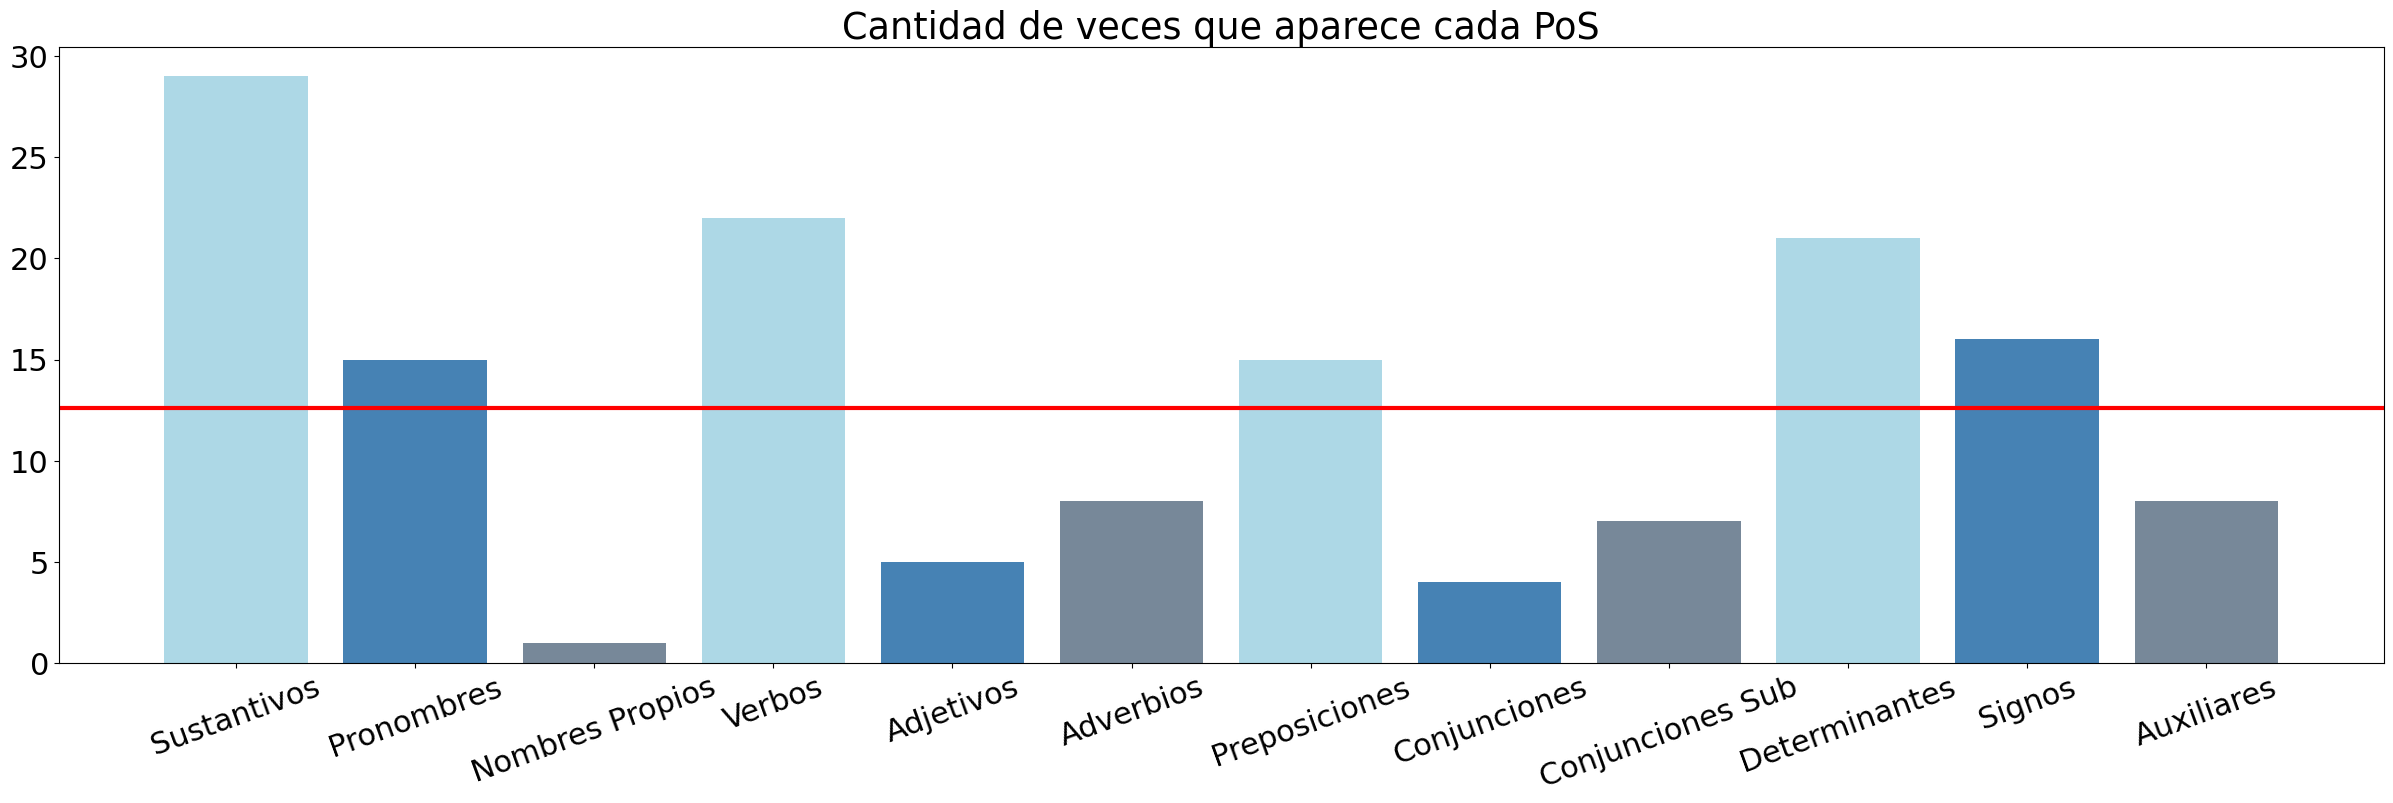

In [13]:
# Declaramos de librería para manejo de gráficos
import matplotlib.pyplot as plt

# Definimos un tamaño para la figura que haremos
plt.figure(figsize=(30, 8))
plt.rcParams.update({'font.size': 22})

# Asignamos la cantidad de veces que aparecen en un diccionario
PoS_Count = {'Sustantivos'     : PoS.count('NOUN'),
             'Pronombres'      : PoS.count('PRON'),
             'Nombres Propios' : PoS.count('PROPN'),
             'Verbos'          : PoS.count('VERB'),
             'Adjetivos'       : PoS.count('ADJ'),
             'Adverbios'       : PoS.count('ADV'),
             'Preposiciones'   : PoS.count('ADP'),
             'Conjunciones'    : PoS.count('CCONJ'),
             'Conjunciones Sub' : PoS.count('SCONJ'),
             'Determinantes'   : PoS.count('DET'),
             'Signos'          : PoS.count('PUNCT'),
             'Auxiliares'      : PoS.count('AUX')}

# Impresión de la gráfica a partir del diccionario (Y el promedio de aparición de cada PoS)
plt.bar(PoS_Count.keys(), PoS_Count.values(), color=['lightblue','steelblue','lightslategrey'])
plt.axhline(sum(PoS_Count.values())/len(PoS_Count.values()), lw = 3, c='r', xmax=100)
plt.xticks(rotation = 20)
plt.title('Cantidad de veces que aparece cada PoS') 
plt.show()

In [23]:
# Creamos el diccionario con todas las PoS
PoS_Words = {'NOUN' : [], 'PRON': [], 'VERB' : [], 'ADJ' : [], 'ADV'  : [], 
             'ADP'  : [], 'CCONJ': [], 'DET' : [], 'PROPN': [], 'PUNCT': [],
             'AUX' : [], 'SCONJ': [], 'PART': []}

# Recopilamos las palabras correspondientes a cada PoS
for Texto in Textos:
    for token in Texto:
        PoS_Words[token.pos_].append(token.text)

# Imprimimos el correspondiente a cada categoría
print("\nPalabras para cada PoS:\n")
for key in PoS_Words.keys():
    print(key + ":\t" + str(set(PoS_Words[key])))

# Encontramos los homógrafos
Words = {}
print("\nPalabras homógramas:\n")
for Texto in Textos:
    for token in Texto:
        if(Words.get(token.text) == None):
            Words.setdefault(token.text, [token.pos_])
        else:
            Words[token.text].append(token.pos_)

# Imprimimos las palabras homógrafas
for Elemento in Words:
    if(len(set(Words[Elemento])) > 1):
        print(Elemento + ":\t" + str(set(Words[Elemento])))


Palabras para cada PoS:

NOUN:	{'suerte', 'tiempo', 'pensamiento', 'mascotas', 'casa', 'células', 'amo', 'ordenadores', 'propiedades', 'solo', 'enfermedad', 'señor', 'ordenador', 'fecha', 'capricho', 'parte', 'inteligencia', 'personas', 'máquinas', 'cosa', 'día', 'modo', 'control', 'vino', 'cura', 'leyes'}
PRON:	{'me', 'que', 'nosotros', 'ello', 'Yo', 'se', 'lo'}
VERB:	{'decidirán', 'dió', 'ver', 'amo', 'puede', 'mantenernos', 'tomen', 'tenía', 'quiero', 'dijo', 'hagan', 'beber', 'dependen', 'haciendo', 'hacer', 'recuperemos', 'diseñado', 'estudiar', 'vino', 'Sobreviviremos', 'tomó', 'tengo'}
ADJ:	{'artificial', 'mayor', 'cerebrales', 'conectadas', 'consciente'}
ADV:	{'no', 'tampoco', 'más', 'arduamente', 'entonces'}
ADP:	{'de', 'en', 'Hasta', 'Para', 'según', 'Con', 'a', 'del'}
CCONJ:	{'pero', 'y', 'sino'}
DET:	{'los', 'las', 'El', 'Las', 'su', 'cualquier', 'la', 'mi', 'el', 'un', 'algún'}
PROPN:	{'ChatBots'}
PUNCT:	{';', '.', ','}
AUX:	{'ha', 'podrán', 'somos', 'son', 'están', 'ser'